In [1]:
from hilbert import operators
from hilbert import fields
from hilbert import spaces

import pandas
import numpy

from matplotlib import pyplot

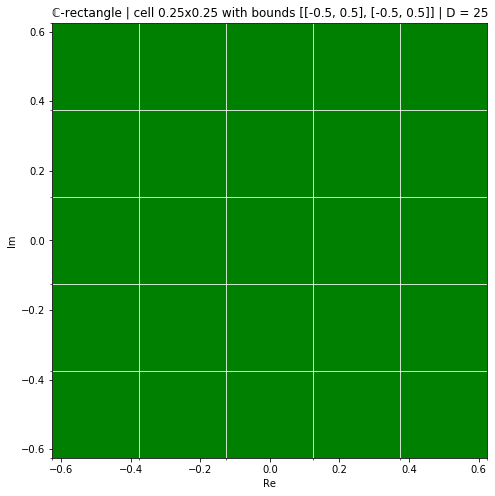

In [2]:
C1L2 = fields.C1Field.rectangle(spaces.LebesgueCurveSpace, -0.5 - 0.5j, 0.5 + 0.5j, 5)  # make L²-space over ℂ

assert C1L2.bases.bounds == [[-0.5, 0.5], [-0.5, 0.5]]
assert C1L2.bases.dimension == 5**2

A = C1L2.op_from_callable(lambda arr: (numpy.random.normal(size=C1L2.bases.dimension) + 0.5j*numpy.random.normal(size=C1L2.bases.dimension)), raw=True)
H = C1L2.operator((A + A.dagger()).o.to_numpy())  # random Hermitian operator
U = C1L2.unitary_op(H)  # random unitary operator - new basis components
C1L2.map_basis(U, new_key='random')  # create new basis by applying U to the position ('delta') basis
fig, ax = C1L2.bases.plot_domain()  # space domain

In [3]:
assert U.is_unitary()  # since U is obtained by exponentiation of an hermitian operator

entry = U.at(0.25j, -0.5j)  # label `at` access by (x, y) in ℂ²
U.setat(0.25j, -0.5j, entry + 10**(-9))  # set entry `at` (x, y) in ℂ²

assert not U.is_unitary()

U.setat(0.25j, -0.5j, entry)

assert U.is_unitary()

In [4]:
assert C1L2.bases.measure*C1L2.bases.dimension == 1.25**2  # total measure (green) != cell bounds area

In [5]:
# Since U is unitary:
assert C1L2.is_basis('random')  # new basis is actually a basis
assert C1L2.is_orthonormal('random')  # new basis is orthonormal

u, v = C1L2.bases[0.25 - 0.5j, :]  # label `loc` access with x in ℂ

assert u == C1L2.vector('random', C1L2.coords('random', u))  # delta vector as linear combination of the random basis

In [6]:
# new basis images - i.e. components in 'x' - are U's columns
assert all((w.image.i == (1/numpy.sqrt(C1L2.bases.measure))*U.o[ix]).all() for ix, w in C1L2.bases.o['random'].items())

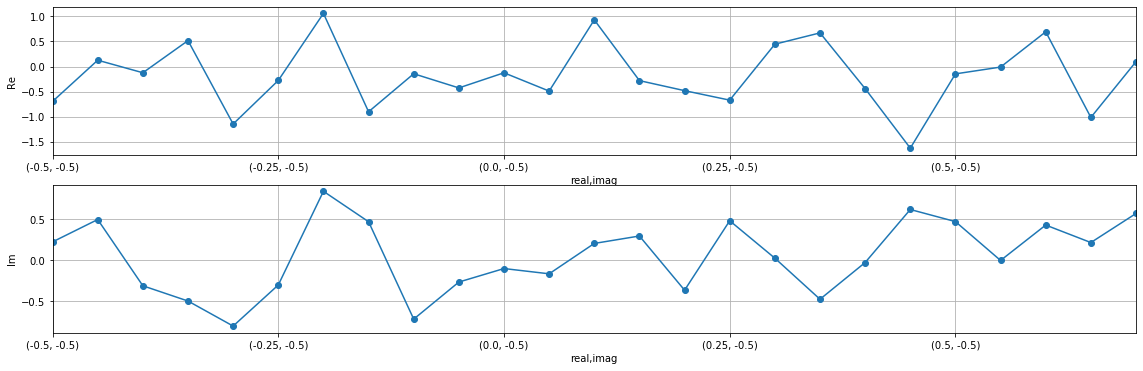

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2125326860>,
       dtype=object))

In [7]:
v.show(style='-o')  # plot a vector

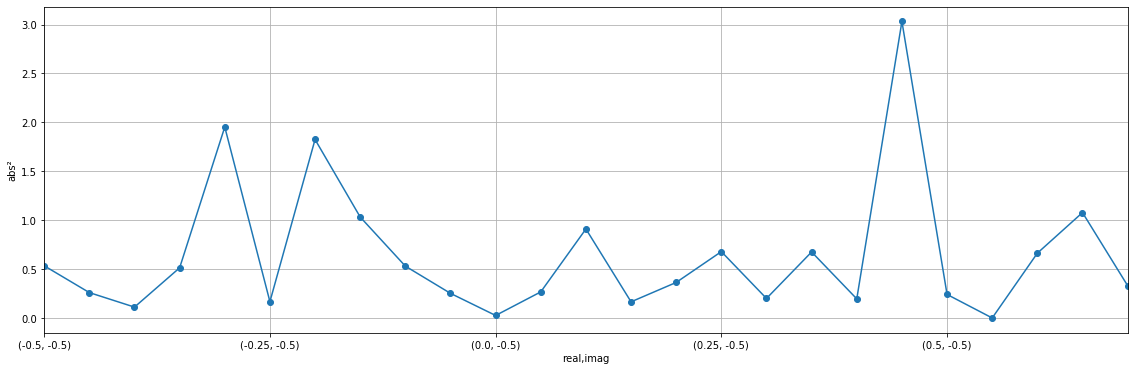

(<Figure size 1397.98x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2124c25860>)

In [8]:
v.show_density(style='-o')  # plot vector abs² values

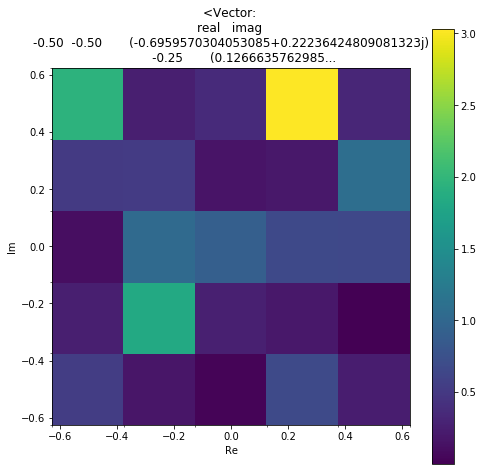

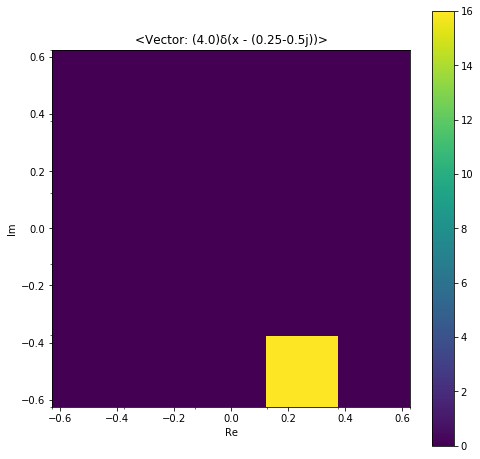

((<Figure size 576x576 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f2124b9c7f0>),
 (<Figure size 576x576 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f2124a88cc0>))

In [9]:
C1L2.bases.density_plot(v), C1L2.bases.density_plot(u)  # abs² values in the plane

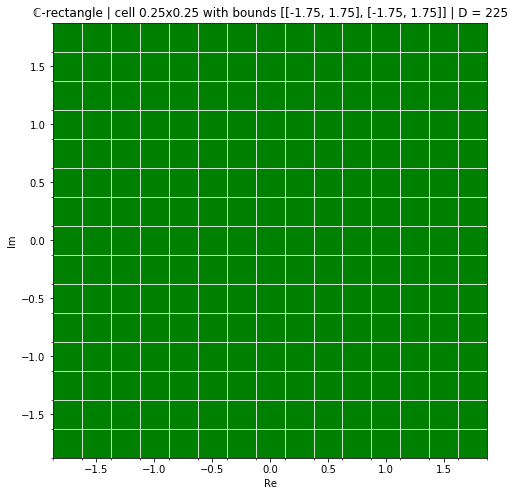

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f21249aaac8>)

In [10]:
C1L2.extend()  # replicate once in each direction

assert C1L2.bases.dimension == (5*3)**2  # new dimension

C1L2.bases.plot_domain()

In [11]:
assert C1L2.is_basis('random')  # automatically extended by vector replication
assert C1L2.is_orthonormal('random')

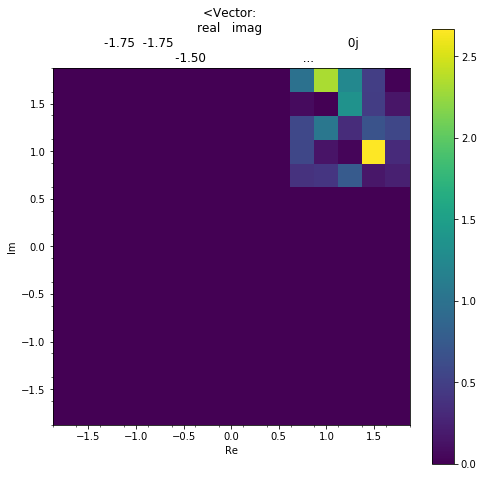

(<Figure size 576x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2122c81668>)

In [12]:
C1L2.bases.density_plot(C1L2.bases.at(1 + 0.75j, 'random'))  # replicated basis vector

In [13]:
C1L2.bases.o  # bases data frame

delta  \
real  imag                               
-1.75 -1.75  (4.0)δ(x - (-1.75-1.75j))   
      -1.50   (4.0)δ(x - (-1.75-1.5j))   
      -1.25  (4.0)δ(x - (-1.75-1.25j))   
      -1.00     (4.0)δ(x - (-1.75-1j))   
      -0.75  (4.0)δ(x - (-1.75-0.75j))   
      -0.50   (4.0)δ(x - (-1.75-0.5j))   
      -0.25  (4.0)δ(x - (-1.75-0.25j))   
       0.00     (4.0)δ(x - (-1.75+0j))   
       0.25  (4.0)δ(x - (-1.75+0.25j))   
       0.50   (4.0)δ(x - (-1.75+0.5j))   
       0.75  (4.0)δ(x - (-1.75+0.75j))   
       1.00     (4.0)δ(x - (-1.75+1j))   
       1.25  (4.0)δ(x - (-1.75+1.25j))   
       1.50   (4.0)δ(x - (-1.75+1.5j))   
       1.75  (4.0)δ(x - (-1.75+1.75j))   
-1.50 -1.75   (4.0)δ(x - (-1.5-1.75j))   
      -1.50    (4.0)δ(x - (-1.5-1.5j))   
      -1.25   (4.0)δ(x - (-1.5-1.25j))   
      -1.00      (4.0)δ(x - (-1.5-1j))   
      -0.75   (4.0)δ(x - (-1.5-0.75j))   
      -0.50    (4.0)δ(x - (-1.5-0.5j))   
      -0.25   (4.0)δ(x - (-1.5-0.25j))   
       0.00      (4.0)δ(x - (-1.5+0j))   
       0.25   (4.0)δ(x - (-1.5+0.25j))   
       0.50    (4.0)δ(x - (-1.5+0.5j))   
       0.75   (4.0)δ(x - (-1.5+0.75j))   
       1.00      (4.0)δ(x - (-1.5+1j))   
       1.25   (4.0)δ(x - (-1.5+1.25j))   
       1.50    (4.0)δ(x - (-1.5+1.5j))   
       1.75   (4.0)δ(x - (-1.5+1.75j))   
...                                ...   
 1.50 -1.75    (4.0)δ(x - (1.5-1.75j))   
      -1.50     (4.0)δ(x - (1.5-1.5j))   
      -1.25    (4.0)δ(x - (1.5-1.25j))   
      -1.00       (4.0)δ(x - (1.5-1j))   
      -0.75    (4.0)δ(x - (1.5-0.75j))   
      -0.50     (4.0)δ(x - (1.5-0.5j))   
      -0.25    (4.0)δ(x - (1.5-0.25j))   
       0.00       (4.0)δ(x - (1.5+0j))   
       0.25    (4.0)δ(x - (1.5+0.25j))   
       0.50     (4.0)δ(x - (1.5+0.5j))   
       0.75    (4.0)δ(x - (1.5+0.75j))   
       1.00       (4.0)δ(x - (1.5+1j))   
       1.25    (4.0)δ(x - (1.5+1.25j))   
       1.50     (4.0)δ(x - (1.5+1.5j))   
       1.75    (4.0)δ(x - (1.5+1.75j))   
 1.75 -1.75   (4.0)δ(x - (1.75-1.75j))   
      -1.50    (4.0)δ(x - (1.75-1.5j))   
      -1.25   (4.0)δ(x - (1.75-1.25j))   
      -1.00      (4.0)δ(x - (1.75-1j))   
      -0.75   (4.0)δ(x - (1.75-0.75j))   
      -0.50    (4.0)δ(x - (1.75-0.5j))   
      -0.25   (4.0)δ(x - (1.75-0.25j))   
       0.00      (4.0)δ(x - (1.75+0j))   
       0.25   (4.0)δ(x - (1.75+0.25j))   
       0.50    (4.0)δ(x - (1.75+0.5j))   
       0.75   (4.0)δ(x - (1.75+0.75j))   
       1.00      (4.0)δ(x - (1.75+1j))   
       1.25   (4.0)δ(x - (1.75+1.25j))   
       1.50    (4.0)δ(x - (1.75+1.5j))   
       1.75   (4.0)δ(x - (1.75+1.75j))   

                                                        random  
real  imag                                                      
-1.75 -1.75  \nreal   imag \n-1.75  -1.75      (0.105188469...  
      -1.50  \nreal   imag \n-1.75  -1.75     (0.4920288820...  
      -1.25  \nreal   imag \n-1.75  -1.75      (-0.83284245...  
      -1.00  \nreal   imag \n-1.75  -1.75      (-1.05146520...  
      -0.75  \nreal   imag \n-1.75  -1.75      (-0.85032888...  
      -0.50  \nreal   imag \n-1.75  -1.75                  ...  
      -0.25  \nreal   imag \n-1.75  -1.75                  ...  
       0.00  \nreal   imag \n-1.75  -1.75                  ...  
       0.25  \nreal   imag \n-1.75  -1.75                  ...  
       0.50  \nreal   imag \n-1.75  -1.75                  ...  
       0.75  \nreal   imag \n-1.75  -1.75                  ...  
       1.00  \nreal   imag \n-1.75  -1.75                  ...  
       1.25  \nreal   imag \n-1.75  -1.75                  ...  
       1.50  \nreal   imag \n-1.75  -1.75                  ...  
       1.75  \nreal   imag \n-1.75  -1.75                  ...  
-1.50 -1.75  \nreal   imag \n-1.75  -1.75      (-0.02181899...  
      -1.50  \nreal   imag \n-1.75  -1.75         (-1.21052...  
      -1.25  \nreal   imag \n-1.75  -1.75     (0.2088425058...  
      -1.00  \nreal   imag \n-1.75  -1.75      (-0.11112155...  
      -0.75  \nreal  

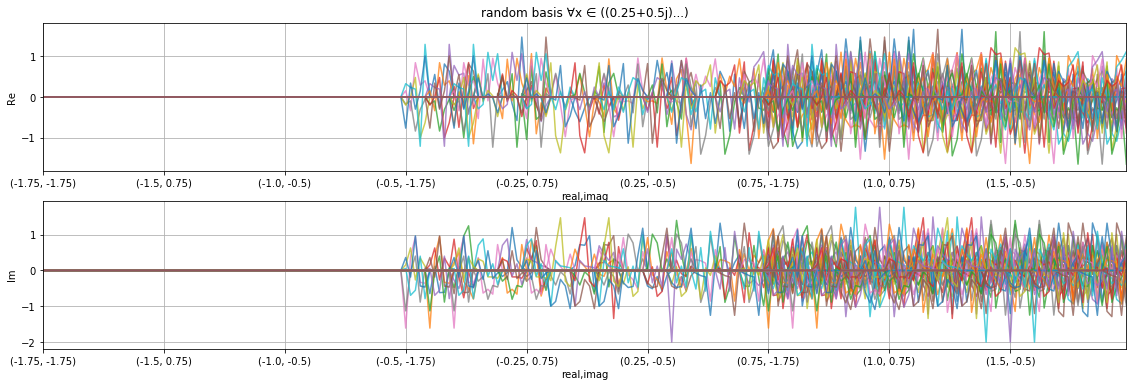

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2122efbac8>,
       dtype=object))

In [14]:
C1L2.show_basis_slice('random', 0.25 + 0.5j, style='-', alpha=0.75)  # transformed basis curves

In [15]:
image_curve = v.curves[0]  # `ImageCurve`s lack analytical definition
image_curve

<ImageCurve: 
real   imag 
-1.75  -1.75    0j
       -1.50    0j
       -1.25    0j
       -1.00    0j
       -0.75    0j
       -0.50    0j
       -0.25    0j
        0.00    0j
        0.25    0j
        0.50    0j
        0.75    0j
        1.00    0j
        1.25    0j
        1.50    0j
        1.75    0j
-1.50  -1.75    0j
       -1.50    0j
       -1.25    0j
       -1.00    0j
       -0.75    0j
       -0.50    0j
       -0.25    0j
        0.00    0j
        0.25    0j
        0.50    0j
        0.75    0j
        1.00    0j
        1.25    0j
        1.50    0j
        1.75    0j
                ..
 1.50  -1.75    0j
       -1.50    0j
       -1.25    0j
       -1.00    0j
       -0.75    0j
       -0.50    0j
       -0.25    0j
        0.00    0j
        0.25    0j
        0.50    0j
        0.75    0j
        1.00    0j
        1.25    0j
        1.50    0j
        1.75    0j
 1.75  -1.75    0j
       -1.50    0j
       -1.25    0j
       -1.00    0j
       -0.75    0j
    

In [16]:
assert all([3.14*image_curve != image_curve, not image_curve == 3])  # `ImageCurve`s algebra and comparison
assert (image_curve(numpy.array([0.25])) == numpy.array([image_curve.image[0.25]])).all()  # `ImageCurve`s evaluation

In [17]:
assert (U == ((+U.dagger() + U)*0.5 + (-U.dagger() + U)/2))  # operator algebra

In [18]:
(1 + 1j*U.dagger()@H@U - H**2)[-0.2j:0.4j, :0.2]  # operator algebra and slicing

real                                           -0.50  \
imag                                           -0.50   
real imag                                              
0.0  0.00   (0.29998219615889044+1.935172333619159j)   
     0.25  (0.00240972990320254+0.1813555315280183j)   

real                                                \
imag                                         -0.25   
real imag                                            
0.0  0.00   (-1.4769098372009855-4.1234837991356j)   
     0.25  (0.7861192527062282+1.110723096515034j)   

real                                                \
imag                                          0.00   
real imag                                            
0.0  0.00  (5.9092596475604005+9.470253216902883j)   
     0.25  (1.199826770231879-1.9617050717516142j)   

real                                                \
imag                                          0.25   
real imag                                            
0.0  0.00  (-12.23658395402288-0.271611837857193j)   
     0.25  (4.417732478271833-1.9175895487567742j)   

real                                                   \
imag                                             0.50   
real imag                                               
0.0  0.00   (2.1324894288720238+0.07636983597372876j)   
     0.25  (0.8063132201669176-0.008009739984734657j)   

real                                         -0.25  \
imag                                         -0.50   
real imag                                            
0.0  0.00  (-10.134784960468078+3.78744834320113j)   
     0.25  (2.082325000905447-1.5340360691574584j)   

real                                                 \
imag                                          -0.25   
real imag                                             
0.0  0.00  (-1.241951913625324+1.5842342816560548j)   
     0.25  (-3.230082822980802-1.1462329031767147j)   

real                                                  \
imag                                            0.00   
real imag                                              
0.0  0.00     (-1.9509367726633655-2.1986369627989j)   
     0.25  (-1.015081345674613-0.02738741232373698j)   

real                                                   \
imag                                             0.25   
real imag                                               
0.0  0.00  (0.8579983755772624+0.004640693032968505j)   
     0.25     (-4.516744464302029+4.135694730473911j)   

real                                                   \
imag                                             0.50   
real imag                                               
0.0  0.00  (-1.5746516430514244-0.47088650154475387j)   
     0.25   (0.7074678832847201-0.11703952670198131j)   

real                                            0.00  \
imag                                           -0.50   
real imag                                              
0.0  0.00  (-0.3623862314755961+0.8476587175234553j)   
     0.25   (1.7515999609160247-3.6872507903202223j)   

real                                                 \
imag                                          -0.25   
real imag                                             
0.0  0.00  (0.24233966235659432+5.303716490561853j)   
     0.25  (1.9515888532975052+0.5565111517005321j)   

real                                                   \
imag                                             0.00   
real imag                                               
0.0  0.00    (-4.982685400808316+2.4459528615262207j)   
     0.25  (-0.24898238360101876-2.7941363934124066j)   

real                                                   \
imag                                             0.25   
real imag                                               
0.0  0.00  (-1.2331029815185575-0.02236215646911832j)   
     0.25     (0.9220034675493579-0.279278592897203j)   

real                                                 
imag                                 

In [19]:
assert (1 - H).at(0.25 - 0.5j, 0.5 - 0.25j) == (1 - H)[0.25 - 0.5j, 0.5 - 0.25j] # rsub

In [20]:
H[0.2j:0.8j, :0.2j] = 33j - 11  # set slice by (x, y) in ℂ²
assert (H[0.2j:0.8j, :0.2j] == -11 + 33j).all().all()